# Version information

In [3]:
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

Running date: June 23, 2023
Pyleecan version:1.5.1
SciDataTool version:2.5.0


In [4]:
# run -m pyleecan


# How to define a machine

This tutorial shows the different ways to define electrical machine. To do so, it presents the definition of the **Toyota Prius 2004** interior magnet with distributed winding \[1\].

The notebook related to this tutorial is available on [GitHub](https://github.com/Eomys/pyleecan/tree/master/Tutorials/tuto_Machine.ipynb).

## Type of machines Pyleecan can model
Pyleecan handles the geometrical modelling of main 2D radial flux machines such as:  
- surface or interior permanent magnet machines (SPMSM, IPMSM)  
- synchronous reluctance machines (SynRM)  
- squirrel-cage induction machines and doubly-fed induction machines (SCIM, DFIM)  
- would rotor synchronous machines and salient pole synchronous machines (WSRM)  
- switched reluctance machines (SRM)  

The architecture of Pyleecan also enables to define other kinds of machines (with more than two laminations for instance). More information in our ICEM 2020 pyblication \[2\]

Every machine can be defined by using the **Graphical User Interface** or directly in **Python script**.

## Defining machine with Pyleecan GUI 
The GUI is the easiest way to define machine in Pyleecan. Its purpose is to create or load a machine and save it in JSON format to be loaded in a python script. The interface enables to define step by step in a user-friendly way every characteristics of the machine such as:  
- topology  
- dimensions  
- materials  
- winding  

Each parameter is explained by a tooltip and the machine can be previewed at each stage of the design.


## Start the GUI
The GUI can be started by running the following command in a notebook:
```python
# Start Pyleecan GUI from the Jupyter Notebook
%run -m pyleecan
```
To use it on Anaconda you may need to create the system variable:

QT_QPA_PLATFORM_PLUGIN_PATH : path\to\anaconda3\Lib\site-packages\PySide2\plugins\platforms

The GUI can also be launched in a terminal by calling one of the following commands in a terminal:
```
Path/to/python.exe -m pyleecan
Path/to/python3.exe -m pyleecan
```

## load a machine
Once the machine defined in the GUI it can be loaded with the following commands:

In [5]:
simul_dir='D:/Thesis'
simul_dir=r'D:\KDH\Manatee\Machine\HDEV_nhole_nskew.json'
# simul_dir=r'Z:\pyleecan_GUI_version\2023_04_13-05h01min32s_FEMM_HDEV_like\FEMM_HDEV_like.json'

In [6]:
%matplotlib inline
# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR


# IPMSM_A = load(join(simul_dir, "Machine", "IPMSM_8p48s_Rotem.json"))

IPMSM_A = load(simul_dir)
IPMSM_A.plot(is_show_fig=False)  

(<Figure size 1600x1600 with 1 Axes>,
 <AxesSubplot:title={'center':'HDEV_nhole_nskew'}, xlabel='Position along x-axis [m]', ylabel='Position along y-axis [m]'>)

## Defining Machine in scripting mode 
Pyleecan also enables to define the machine in scripting mode, using different classes. Each class is defined from a csv file in the folder _pyleecan/Generator/ClasseRef_ and the documentation of every class is available on the dedicated [webpage](https://www.pyleecan.org/pyleecan.Classes.html).
The following image shows the machine classes organization : 

![](https://www.pyleecan.org/_static/machine_classes_UML.png)

Every rotor and stator can be created with the **Lamination** class or one of its daughters.  

![](https://www.pyleecan.org/_static/lamination_classes_UML.png)

The scripting enables to define some complex and exotic machine that can't be defined in the GUI such as this one:

In [7]:
from pyleecan.Classes.MachineUD import MachineUD
from pyleecan.Classes.LamSlotWind import LamSlotWind
from pyleecan.Classes.LamSlot import LamSlot
from pyleecan.Classes.Winding import Winding
from pyleecan.Classes.SlotW10 import SlotW10
from pyleecan.Classes.SlotW22 import SlotW22
from numpy import pi


## Stator definition
To define the stator, we initialize a [**LamSlotWind**](http://pyleecan.org/pyleecan.Classes.LamSlotWind.html) object with the different parameters. In pyleecan, all the parameters must be set in SI units.

In [8]:
# MotorCAD variable
i_Stator_OD             = 400  # Stator outer diameter
i_Active_Length     = 130.   # Active length
p_Airgap_Mecha         = 1.    # Mechanical airgap
# Rint
# Kf1
p_Stator_Slots         = 72.   # Number of stator slots
i_Slot_Corner_Radius    = 1.4     
#i_Tooth_Width  = 6     
p_Tooth_Tip_Depth       = 1    # Tooth tip depth  -> H0
p_Tooth_Tip_Angle       = 20   # Tooth tip angle  

#### Ratio(Stator w Hierachy)
p_Slot_Depth_Ratio      =   1
i_MinBackIronThickness  = 20

# i_Tooth_Width           = 6
# ex, i_Tooth_Width                   = mcApp.GetVariable("Tooth_Width")           # Absolute Tooth_Width

#### Ratio(Stator w Hierachy)
# i_Tooth_Width_Ratio                 =0.6  -> r_Tooth_Width_Ratio
i_Split_Ratio                       =0.705  
i_YtoT                              =2.5                                           #ratio user defined YtoT 
                                                                   #get absolute value from ratio
i_Slot_Op_Ratio        =0.8     

### Geometry


# def fun_YtoT(i_YtoT, i_Tooth_Width):
#     res = i_Tooth_Width*i_YtoT
#     return res

# i_MinThicknessBackIron             =fun_YtoT(i_YtoT,i_Tooth_Width)                             
# mcApp.SetVariable('MinBackIronThickness'                    , i_MinBackIronThickness )        #Abosolute be user-defined with Y to T ratio     

slot_pitch=360/p_Stator_Slots  # [in angle]


## Slot Definition MotorCAD to Pyleecan

In [479]:
Rext=i_Stator_OD/2 
Rint = (i_Stator_OD *i_Split_Ratio)/2
import math

slot_pitch_rad  =  math.radians(slot_pitch)
slot_pitch_rad
print(Rext,Rint,i_Split_Ratio)

200.0 141.0 0.705


## Process
#Bore Radio -> Stator Thciness -> #Slot Depth ratio -> BackIronThickness
#i_YtoT -> (implicit)Toodth Wdith ratio

In [10]:
from pyleecan.Classes.LamSlotWind import LamSlotWind
mm = 1e-3  # Millimeter

# Lamination setup
stator = LamSlotWind(
    
    Rext=i_Stator_OD/2  * mm, # external radius [m]
    Rint=Rint * mm, # internal radius [m]
    L1=i_Active_Length * mm, # Lamination stack active length [m] without radial ventilation airducts 
                # but including insulation layers between lamination sheets
    Nrvd=0, # Number of radial air ventilation duct
    Kf1=0.95, # Lamination stacking / packing factor
    is_internal=False,
    is_stator=True, 
)


### Define Slot Depth

#### MinBackYoke Define Type

In [12]:
# i_MinBackIronThickness             =fun_YtoT(i_YtoT,i_Tooth_Width)       
# i_MinBackIronThickness purturb?
# Min을 잡기가 Rint랑 Rext 에 따라 달라짐
# i_MinBackIronThickness=20
# i_YtoT=2.5
# i_MinBackIronThickness=40  #(Maximum <(Rext-Rint)
# p_Slot_Depth_Ratio      =   1  # To control Min Back iron Thickness
SlotDeptRatioReal=-(1-p_Slot_Depth_Ratio)
# Rext-Slot_Depth-i_MinBackIronThickness-Rint =ResLength

ThicknessStatorRegion=Rext-Rint
ResLength=-SlotDeptRatioReal*(ThicknessStatorRegion-i_MinBackIronThickness)
Slot_Depth=+Rext-Rint-i_MinBackIronThickness-ResLength

Stator_Lam_Thickness=(ThicknessStatorRegion-Slot_Depth/p_Slot_Depth_Ratio) # why?
Stator_Lam_Thickness  

# Stator_Lam_Thickness=ThicknessStatorRegion/2
# Slot_Depth/Stator_Lam_Thickness
# i_YtoT

# p_Slot_Depth_Ratio
# H2=Slot_Depth-p_Tooth_Tip_Depth-H1 #slot_Depth # Bore to Slot Bottom

mcApp.SetVariable('MinBackIronThickness'                    , i_MinBackIronThickness )        #Abosolute be user-defined with Y to T ratio     
mcApp.SetVariable("Ratio_SlotDepth_ParallelTooth"           , p_Slot_Depth_Ratio     ) 

# Check
Rext=i_Stator_OD/2 
Rint = (i_Stator_OD *i_Split_Ratio)/2    
ThicknessStatorRegion=Rext-Rint
ResLength=-SlotDeptRatioReal*(ThicknessStatorRegion-i_MinBackIronThickness)
Slot_Depth=+Rext-Rint-i_MinBackIronThickness-ResLength
##### 
print('Ratio_SlotDepth_ParallelTooth -so it is not Slot Depth/Stator Lam Thickness(Yoke):',p_Slot_Depth_Ratio)
print('Contraints Min BackIron(Yoke):',i_MinBackIronThickness,',Dimension: SlotDepth',Slot_Depth)
# print('i_MinBackIronThickness=',i_MinBackIronThickness,'Slot_Depth=',Slot_Depth,'ResLength',ResLength)
# H0=p_Tooth_Tip_Depth*mm,
# H1=H1*mm,
# H2=(H2-H0-H1)*mm,
print('Stator_Lam_Thickness(Yoke)',Stator_Lam_Thickness,'==i_MinBackIronThickness',i_MinBackIronThickness)

#Ratio_SlotDepth_ParallelTooth" )   %% Fixed     




Ratio_SlotDepth_ParallelTooth -so it is not Slot Depth/Stator Lam Thickness(Yoke): 1
Contraints Min BackIron(Yoke): 20 ,Dimension: SlotDepth 39.0
Stator_Lam_Thickness(Yoke) 20.0 ==i_MinBackIronThickness 20


In [477]:
mcApp.SetVariable('Tooth_Tip_Depth'     , p_Tooth_Tip_Depth)                  # Tooth tip depth

0

#### Slot Depth Ratio Define Type

In [548]:

## Slot Depth
i_Depth_Slot_Ratio=0.7    
p_MinThicknessBackIron = 0.1

# calc
Rext=i_Stator_OD/2 
Rint = (i_Stator_OD *i_Split_Ratio)/2
ThicknessStatorRegion=Rext-Rint
BackIronThickness=(1-i_Depth_Slot_Ratio)*(ThicknessStatorRegion-0.1)

In [551]:
mcApp.SetVariable("Ratio_SlotDepth_ParallelTooth"           , i_Depth_Slot_Ratio     ) 
mcApp.SetVariable('MinBackIronThickness'                    , p_MinThicknessBackIron )        #Abosolute be user-defined with Y to T ratio     
mcApp.DisplayScreen('Radial')   
ex,Slot_DepthGetVar=mcApp.GetVariable('Slot_Depth')
Slot_DepthGetVar


41.23

### Define Tooth Width 

#### Define with i_YtoT

In [540]:
i_YtoT =2.5

def calcImplicitToothWidthRatio(BackIronThickness,i_YtoT,p_Tooth_Tip_Depth,i_Stator_OD,i_Split_Ratio,p_Stator_Slots):
    # stator Dimension
    Rint = (i_Stator_OD *i_Split_Ratio)/2    
    import math
    slot_pitch=360/p_Stator_Slots  # [in angle]
    slot_pitch_rad  =  math.radians(slot_pitch)
    ## Tooth Width Calc
    ToothWidth=BackIronThickness/i_YtoT
    # Radius
    Radius_ToothWidth=Rint+p_Tooth_Tip_Depth-0.05 
    # Angle 
    Angle_Radian_ToothWidth=ToothWidth/Radius_ToothWidth
    imp_Tooth_Width_Ratio=Angle_Radian_ToothWidth/slot_pitch_rad

    return imp_Tooth_Width_Ratio

In [543]:
imp_Tooth_Width_Ratio=calcImplicitToothWidthRatio(BackIronThickness,i_YtoT,p_Tooth_Tip_Depth,i_Stator_OD,i_Split_Ratio,p_Stator_Slots)
# set
mcApp.SetVariable("Ratio_ToothWidth"                        , imp_Tooth_Width_Ratio    )        #Ratio_ToothWidth" )      
mcApp.DisplayScreen('Radial')   
print('### Define Tooth Width ')
print('i_YtoT:',i_YtoT)
print('implicit Tooth_Width_Ratio=',imp_Tooth_Width_Ratio)
print('Stator Bore As Contraints=',2*Rint,'Dimension=',ToothWidth)
print('->ToothWidth is with YtoT')

### Define Tooth Width 
i_YtoT: 2.5
implicit Tooth_Width_Ratio= 0.5705763573067502
Stator Bore As Contraints= 282.0 Dimension= 7.0680000000000005
->ToothWidth is with YtoT


### Define Slot Opening

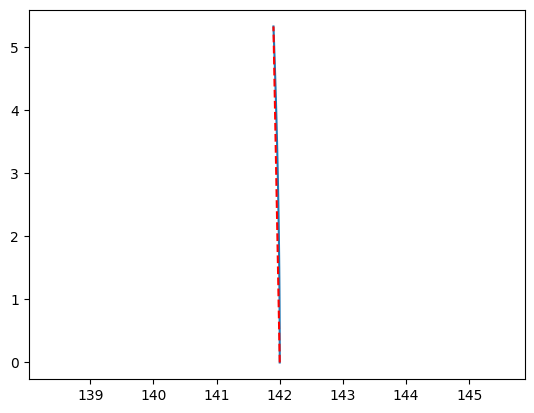

Slot Pitch Angle 5.0
AngToothWidth: 2.852881786533751 RadiusToothWidth: 141.95
SlotOpenWidth: 2.147118213466249 deg
MaxSlotOpen: 5.321036715388375 mm


In [546]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_arc(radius, start_angle, end_angle):
    theta = np.linspace(start_angle, end_angle, 100)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y)
    plt.axis('equal')

def calculate_arc_length(radius, angle):
    return radius * angle

def calculate_distance(radius, angle):
    return 2 * radius * np.sin(angle / 2)

# Example usage
radius = Rint+p_Tooth_Tip_Depth
start_angle = 0
# end_angle = 2.5* np.pi / 180
end_angle=(slot_pitch*np.pi/180-RadToothWidth)
plot_arc(radius, start_angle, end_angle)

arc_length = calculate_arc_length(radius, end_angle - start_angle)
distance = calculate_distance(radius, end_angle - start_angle)

# Calculate the coordinates of the two points on the arc
x_start = radius * np.cos(start_angle)
y_start = radius * np.sin(start_angle)
x_end = radius * np.cos(end_angle)
y_end = radius * np.sin(end_angle)

# Plot a straight line representing the distance
plt.plot([x_start, x_end], [y_start, y_end], 'r--')

plt.show()
arc_length
W0=distance
MaxSlotOpen=W0
AngToothWidth=math.degrees(RadToothWidth)
AngleSlotOpen=math.degrees(end_angle)

print('Slot Pitch Angle',slot_pitch)
print('AngToothWidth:',AngToothWidth,'RadiusToothWidth:',RadiusToothWidth)
print('SlotOpenWidth:',AngleSlotOpen,'deg')
print('MaxSlotOpen:',MaxSlotOpen,'mm')

# MaxSlotOpen=Rint*RadToothWidth

In [547]:
i_Slot_Op_Ratio=0.9
mcApp.SetVariable("Ratio_SlotOpening_ParallelTooth"         , i_Slot_Op_Ratio        )        #Ratio_SlotOpening_ParallelTooth" )      

# RatioToothVSslotOpen=8/4.39
SlotOpen=MaxSlotOpen*i_Slot_Op_Ratio
# RatioOpenVsToothWidth=8/SlotOpen
print('### Define Slot Opening')
print('Slot Opening/Max Slot Opening',i_Slot_Op_Ratio)
print('Contraints:',ToothWidth,', Dimension:Slot Opening',SlotOpen)
mcApp.DisplayScreen('Radial')   



### Define Slot Opening
Slot Opening/Max Slot Opening 0.9
Contraints: 7.0680000000000005 , Dimension:Slot Opening 4.788933043849537


0

Then we add 48 slots using [**SlotW11**](http://pyleecan.org/pyleecan.Classes.SlotW11.html) which is one of the 25 Slot classes: 

W0: 3.511076071086955
W3: 8.0
H0: 1
H1: 0.5
H2: 37.5
R1: 0.5
R2: 1.4


c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan151\lib\site-packages\pyleecan\Methods\Slot\SlotW15\plot_schematics.py:405: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan151\lib\site-packages\pyleecan\Methods\Slot\Slot\plot.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Slot'}, xlabel='[m]', ylabel='[m]'>)

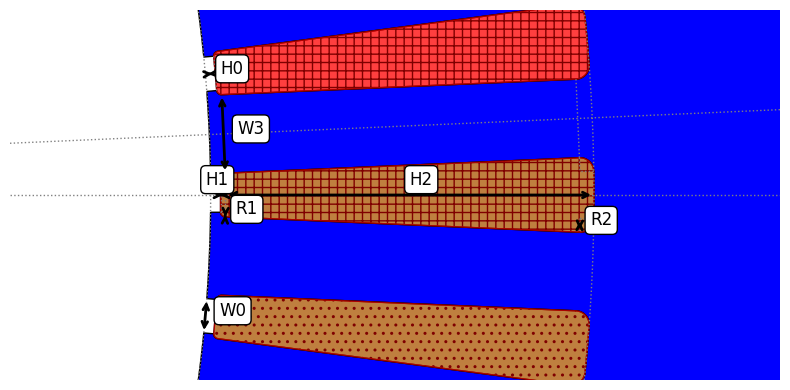

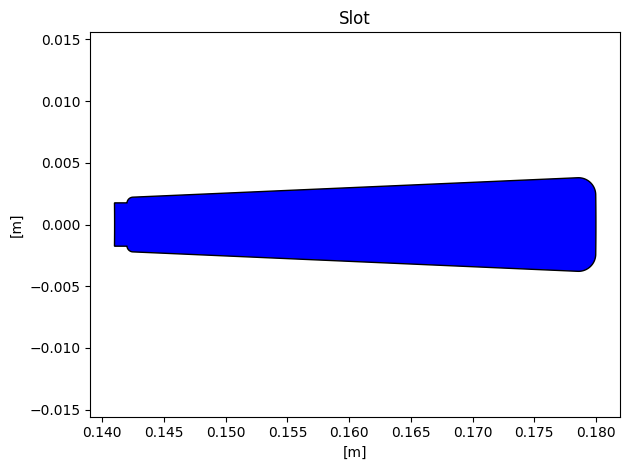

In [16]:
%matplotlib inline
# from pyleecan.Classes.SlotW11 import SlotW11
from pyleecan.Classes.SlotW15 import SlotW15
from pyleecan.Classes.SlotM11 import SlotM11
from pyleecan.Classes.SlotW61 import SlotW61 
from pyleecan.Classes.SlotW60 import SlotW60
from pyleecan.Classes.SlotW29 import SlotW29
from pyleecan.Classes.SlotW28 import SlotW28
from pyleecan.Classes.SlotW27 import SlotW27
from pyleecan.Classes.SlotW26 import SlotW26
from pyleecan.Classes.SlotW25 import SlotW25
from pyleecan.Classes.SlotW24 import SlotW24
from pyleecan.Classes.SlotW23 import SlotW23
from pyleecan.Classes.SlotW22 import SlotW22
from pyleecan.Classes.SlotW21 import SlotW21
from pyleecan.Classes.SlotW16 import SlotW16
from pyleecan.Classes.SlotW15 import SlotW15
from pyleecan.Classes.SlotW14 import SlotW14
from pyleecan.Classes.SlotW13 import SlotW13

# Slot setup
SlotW15
# stator.slot = SlotW61(
#     # Zs=48, # Slot number
#     # H0=1.0 * mm,  # Slot isthmus height
#     # H1=0, # Height
#     # H2=33.3 * mm, # Slot height below wedge 
#     # W0=1.93 * mm,  # Slot isthmus width
#     # W1=5 * mm, # Slot top width
#     # W2=8 * mm, # Slot bottom width
#     # R1=1 * mm # Slot bottom radius
# )
# stator.slot = SlotW61()
# stator.slot = SlotW60()
# stator.slot = SlotW29()
# stator.slot = SlotW28()
# stator.slot = SlotW27()
# stator.slot = SlotW26()
# stator.slot = SlotW25()
# stator.slot = SlotW24()
# stator.slot = SlotW23()
# stator.slot = SlotW22()
# stator.slot = SlotW21()
# stator.slot = SlotW16()

# W0	                
# RadiusToothWidth Rint    # Contraints

W0=SlotOpen                 #	Slot isthmus width.
W3=ToothWidth               # 
H0=p_Tooth_Tip_Depth        #	Slot isthmus height.
Bore2Bottom=Slot_Depth      # (Slot Depth)
H1=0.5	                    #	Slot intermediate height.
H2=Bore2Bottom-H0-H1	    #	Slot height 
R1=H1	                    #	Top radius
R2=i_Slot_Corner_Radius     #	Bottom radius
Slot_Depth
print('W0:',W0)
print('W3:',W3)
print('H0:',H0)
print('H1:',H1)
print('H2:',H2)
print('R1:',R1)
print('R2:',R2)

stator.slot = SlotW15(
            Zs=72,
            W0=W0*mm,
            W3=W3*mm,
            H0=H0*mm,
            H1=H1*mm,
            H2=H2*mm,
            R1=R1*mm,
            R2=i_Slot_Corner_Radius*mm,
)

# stator.slot = SlotW14(
#             Zs=72,
#             W0=W0*mm,
#             W3=W3*mm,
#             H0=H0*mm,
#             H1=H1*mm,
#             H2=H2*mm,
#             R1=R1*mm,
#             R2=i_Slot_Corner_Radius*mm,
# )

# stator.slot = SlotW14()
# stator.slot = SlotW13()
stator.slot.plot_schematics()
stator.slot.plot()

[01:15:49] Saving MachineIPMSM to file 'testGeo.json'.
Saving MachineIPMSM to file 'testGeo.json'.


AttributeError: 'LamH' object has no attribute 'get_hole_list'

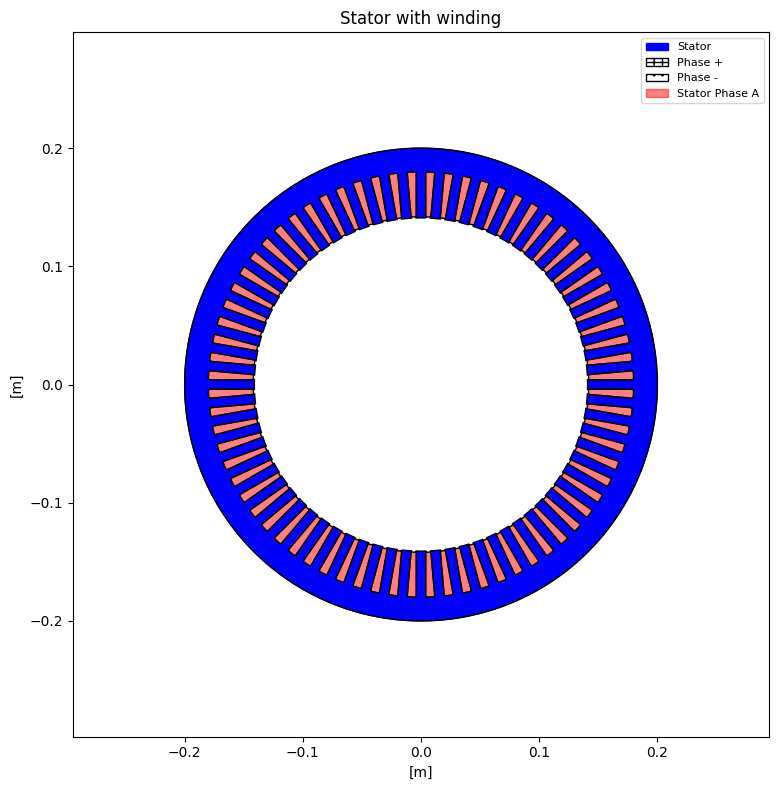

In [365]:
from pyleecan.Classes.MachineIPMSM import MachineIPMSM

# %matplotlib notebook
testGeo = MachineIPMSM(
    name="testGeo", 
    stator=stator, 
    # rotor=rotor, 
    # shaft=shaft, 
    # frame=frame  # None
)
testGeo.save('testGeo.json')

im=testGeo.plot()

As for the slot, we can define the winding and its conductor with [**Winding**](http://pyleecan.org/pyleecan.Classes.Winding.html) and [**CondType11**](http://pyleecan.org/pyleecan.Classes.CondType11.html). The conventions for winding are further explained on [pyleecan website](https://pyleecan.org/winding.convention.html)

In [438]:

from pyleecan.Classes.Winding import Winding
from pyleecan.Classes.CondType11 import CondType11
# Winding setup
p_Pole_Pair            = 6    # Number of rotor poles

stator.winding = Winding(
    qs=3,  # number of phases
    p=p_Pole_Pair,  # number of pole pairs
    Nlayer=1,  # Number of layers per slots
    coil_pitch=6, # Coil pitch (or coil span)
    Lewout=0,  # staight length of conductor outside lamination before EW-bend
    Ntcoil=11,  # number of turns per coil
    Npcp=4,  # number of parallel circuits per phase
    Nslot_shift_wind=0,  # 0 not to change the stator winding connection matrix built by pyleecan number 
                         # of slots to shift the coils obtained with pyleecan winding algorithm 
                         # (a, b, c becomes b, c, a with Nslot_shift_wind1=1)
    is_reverse_wind=False, # True to reverse the default winding algorithm along the airgap 
                         # (c, b, a instead of a, b, c along the trigonometric direction)
    per_a=1
)

# # Conductor setup
# stator.winding.conductor = CondType11(
#     Nwppc_tan=1, # stator winding number of preformed wires (strands) 
#                  # in parallel per coil along tangential (horizontal) direction
#     Nwppc_rad=1, # stator winding number of preformed wires (strands) 
#                  # in parallel per coil along radial (vertical) direction
#     Wwire=0.000912, #  single wire width without insulation [m]
#     Hwire=2e-3, # single wire height without insulation [m]
#     Wins_wire=1e-6, # winding strand insulation thickness [m]
#     type_winding_shape=0, # type of winding shape for end winding length calculation
#                           # 0 for hairpin windings
#                           # 1 for normal windings
# )

{'cond_mat': {'name': 'Material',
  'is_isotropic': False,
  'elec': {'rho': 0, 'epsr': 1, 'alpha': 0, '__class__': 'MatElectrical'},
  'mag': {'mur_lin': 1,
   'Brm20': 0,
   'alpha_Br': 0,
   'Wlam': 0,
   'BH_curve': {'__class__': 'ImportMatrix', 'is_transpose': False},
   'LossData': {'__class__': 'ImportMatrix', 'is_transpose': False},
   'ModelBH': {'Bmax': 2.31,
    'Hmax': None,
    'delta': 100,
    '__class__': 'ModelBH'},
   'is_BH_extrapolate': False,
   '__class__': 'MatMagnetics'},
  'struct': {'rho': 7650,
   'Ex': 215000000000.0,
   'Ey': 215000000000.0,
   'Ez': 80000000000,
   'nu_xy': 0.3,
   'nu_xz': 0.03,
   'nu_yz': 0.03,
   'Gxz': 2000000000,
   'Gxy': 0,
   'Gyz': 2000000000,
   '__class__': 'MatStructural'},
  'HT': {'lambda_x': 1,
   'lambda_y': 1,
   'lambda_z': 1,
   'Cp': 1,
   'alpha': 0,
   '__class__': 'MatHT'},
  'eco': {'cost_unit': 0.127, 'unit_name': '$', '__class__': 'MatEconomical'},
  'desc': 'Material description',
  'path': '',
  '__class__': 'M

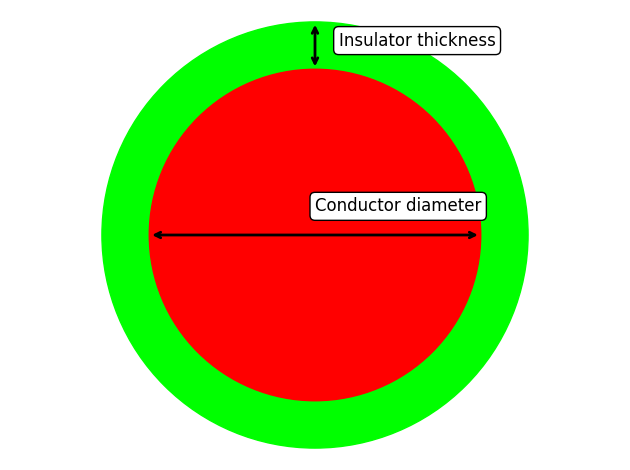

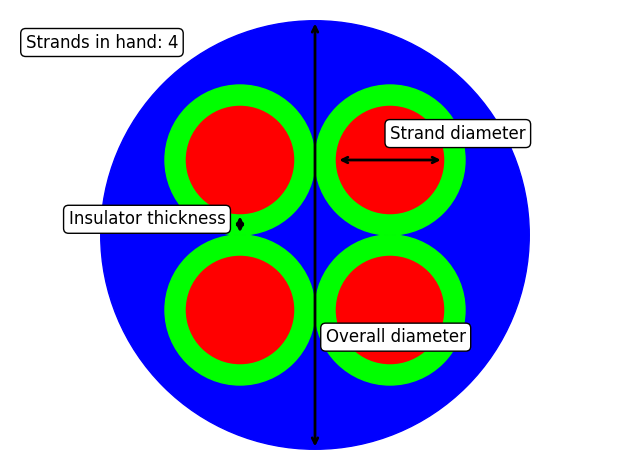

In [439]:
stator.winding.conductor  = CondType12(
    Wwire= 0.8079*mm,
    Wins_cond= 0.8739*mm,
    Nwppc= 22,
    Wins_wire=0.033*mm,

)
cond=stator.winding.conductor
fig, ax = cond.plot_schematics(is_default=True, is_single=True, is_show_fig=False)
fig, ax = cond.plot_schematics(is_default=True, is_single=False, is_show_fig=False)
cond.as_dict()
# cond.plot()

In [440]:
t = math.gcd(72, 6)
t

6

In [441]:
stator.winding.comp_connection_mat()  # Compute the winding pattern with swat-em
wind_mat = stator.winding.get_connection_mat()

print(wind_mat.shape)  
print(wind_mat)

(1, 1, 72, 3)
[[[[ 11.   0.   0.]
   [ 11.   0.   0.]
   [  0.   0. -11.]
   [  0.   0. -11.]
   [  0.  11.   0.]
   [  0.  11.   0.]
   [-11.   0.   0.]
   [-11.   0.   0.]
   [  0.   0.  11.]
   [  0.   0.  11.]
   [  0. -11.   0.]
   [  0. -11.   0.]
   [ 11.   0.   0.]
   [ 11.   0.   0.]
   [  0.   0. -11.]
   [  0.   0. -11.]
   [  0.  11.   0.]
   [  0.  11.   0.]
   [-11.   0.   0.]
   [-11.   0.   0.]
   [  0.   0.  11.]
   [  0.   0.  11.]
   [  0. -11.   0.]
   [  0. -11.   0.]
   [ 11.   0.   0.]
   [ 11.   0.   0.]
   [  0.   0. -11.]
   [  0.   0. -11.]
   [  0.  11.   0.]
   [  0.  11.   0.]
   [-11.   0.   0.]
   [-11.   0.   0.]
   [  0.   0.  11.]
   [  0.   0.  11.]
   [  0. -11.   0.]
   [  0. -11.   0.]
   [ 11.   0.   0.]
   [ 11.   0.   0.]
   [  0.   0. -11.]
   [  0.   0. -11.]
   [  0.  11.   0.]
   [  0.  11.   0.]
   [-11.   0.   0.]
   [-11.   0.   0.]
   [  0.   0.  11.]
   [  0.   0.  11.]
   [  0. -11.   0.]
   [  0. -11.   0.]
   [ 11.   0.   0.]
   [ 1

Nwppc_rad=Nwppc_tan=1
More than one strands


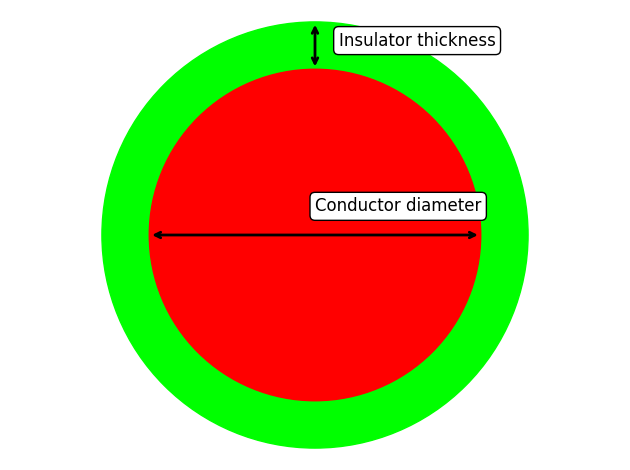

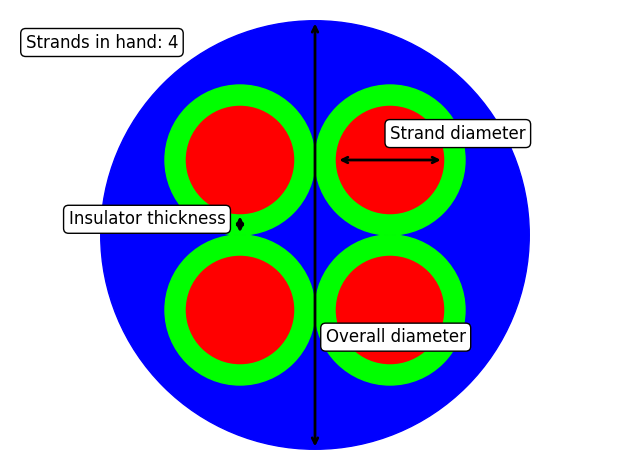

In [442]:

print("Nwppc_rad=Nwppc_tan=1")
fig, ax = stator.winding.conductor.plot_schematics(is_default=True, is_single=True, is_show_fig=False)
print("More than one strands")
fig, ax = stator.winding.conductor.plot_schematics(is_default=True, is_single=False, is_show_fig=False)
from pyleecan.Classes.CondType12 import CondType12



The winding pattern is defined with the star of slot method (thanks to [swat-em](https://swat-em.readthedocs.io/en/latest/) package) according to Zs, qs, p, Nlayer and coil_pitch. Another class named [**WindingUD**](http://pyleecan.org/pyleecan.Classes.WindingUD.html) enables to manually define the winding pattern by enforcing a connexion matrix.

## Rotor definition

For this example, we use the [**LamHole**](http://www.pyleecan.org/pyleecan.Classes.LamHole.html) class to define the rotor as a lamination with holes to contain magnet.

In the same way as for the stator, we start by defining the lamination:

### shaft Hole ratio

In [443]:
# Shaft Hole
RatioShaftDia=0.3036
ROD=(Rint-p_Airgap_Mecha)
Rshaft=ROD*RatioShaftDia
print("RatioShaftHole=Shaft Dia/Rotor Outer Dia",RatioShaftDia,Rshaft/ROD)
print("Contraints:",ROD*2,"Dimension:",Rshaft*2)

print("Contraints:","Dimension:")

RatioShaftHole=Shaft Dia/Rotor Outer Dia 0.3036 0.3036
Contraints: 280.0 Dimension: 85.008
Contraints: Dimension:


### Rotor Lamination (shaft)

c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan151\lib\site-packages\pyleecan\Methods\Machine\LamH\plot.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Rotor with Interior Magnet'}, xlabel='(m)', ylabel='(m)'>)

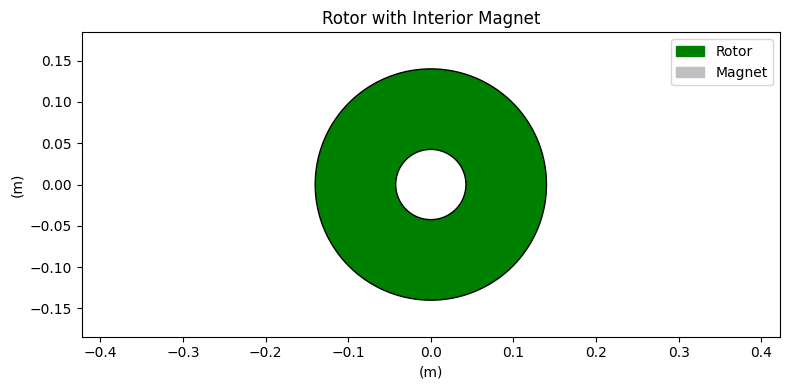

In [444]:
from pyleecan.Classes.LamHole import LamHole

# Rotor setup
rotor = LamHole(
    Rint=Rshaft * mm, # Internal radius
    Rext=ROD * mm, # external radius
    is_internal=True, 
    is_stator=False,
    L1=stator.L1 # Lamination stack active length [m] 
                 # without radial ventilation airducts but including insulation layers between lamination sheets
)
rotor # plot rotor 
rotor.plot()


### Layer 1 Pole Arc


After that, we can add holes with magnets to the rotor using the class [**HoleM50**](http://www.pyleecan.org/pyleecan.Classes.HoleM50.html): 

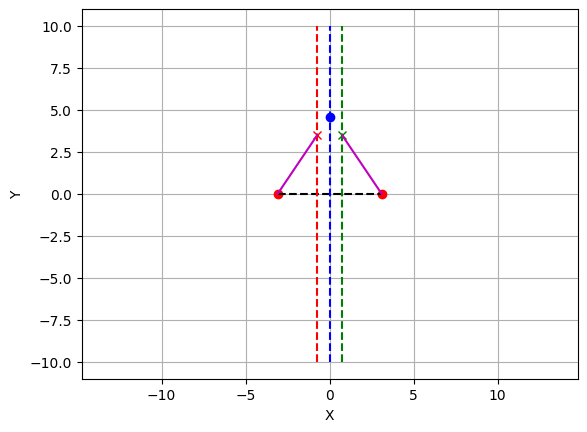

Distance: 4.202485377432792


In [314]:
import matplotlib.pyplot as plt
import numpy as np

# 두 점의 좌표
point1 = np.array([-3.1, 0])
point2 = np.array([3.1, 0])

# 두 점의 중앙점 계산
midpoint = (point1 + point2) / 2

angle = np.radians(112/2)

# Calculate the slope of the line
slope1 = np.tan(angle)
y1_intercept = 0 - slope1 * point1[0]  # y절편

# Calculate the x values for the line
x1 = np.linspace(point1[0], point2[0], 100)
# Calculate the y values for the line
y1 = slope1 * x1 + y1_intercept

slope2 = -slope1
y2_intercept = 0 - slope2 * point2[0]  # y절편
x2 = np.linspace(point2[0], point1[0], 100)
y2 = slope2 * x2 + y2_intercept

# Calculate the intersection point of the two lines
intersection_x = (y2_intercept - y1_intercept) / (slope1 - slope2)
intersection_y = slope1 * intersection_x + y1_intercept

# 두 점을 플롯
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'ro')

# 두 점 사이의 거리의 수평선 그리기
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], 'k--')
# 수평선에 수직한 직선 그리기
plt.plot([midpoint[0], midpoint[0]], [point1[1]-10, point1[1] + 10], 'b--')

# plt.plot(x1, y1, 'm-')
# plt.plot(x2, y2, 'm-')

# Plot the intersection point
plt.plot(intersection_x, intersection_y, 'bo')

# Calculate the horizontal offset from the intersection point
offset = 0.75  # 1.5/2 mm

# Calculate the x values for the parallel lines
x_offset1 = intersection_x - offset

# Calculate the y values for the parallel lines
y_offset = np.linspace(point1[1] - 10, point1[1] + 10, 100)

# Plot the first parallel line
plt.plot([x_offset1, x_offset1], [y_offset[0], y_offset[-1]], 'r--')

# Calculate the x values for the second parallel line
x_offset2 = intersection_x + offset

# Plot the second parallel line
plt.plot([x_offset2, x_offset2], [y_offset[0], y_offset[-1]], 'g--')

# Calculate the intersection point of the line and the perpendicular line
intersection_xred = x_offset1
intersection_yred = slope1 * intersection_xred + y2_intercept

# Calculate the intersection point of the line and the perpendicular line
intersection_xblue = x_offset2
intersection_yblue = slope2 * intersection_xblue + y1_intercept


# Plot the intersection point of the line and the perpendicular line
plt.plot(intersection_xred, intersection_yred, 'rx')
plt.plot(intersection_xblue, intersection_yblue, 'gx')

#

plt.plot([x1[0],intersection_xred], [y1[0],intersection_yred], 'm-')
plt.plot([x2[0],intersection_xblue], [y2[0],intersection_yblue], 'm-')


# Show the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

W2 = np.sqrt((intersection_xred - x1[0])**2 + (intersection_yred - y1[0])**2)
print("Distance:", W2)

In [327]:
        W0=math.radians(L1_Pole_V_angle),
W0

(1.9547687622336491,)

In [445]:
from pyleecan.Classes.HoleM57 import HoleM57
# HoleM53.plot()
L1_Magnet_Thickness =5.2
L1_Bridge_Thickness = 1.8 # Bridge between magnets and rotor outer lamination 
L1_Pole_V_angle =112
L1_Magnet_Post      = 1.5
L1_Magnet_Separation   =    6.2
centerToEdgeofMagnet=(L1_Magnet_Post+L1_Magnet_Separation)/2
W2=0
W3 =3.5
print("Absolute Value")
print("H1=                        ",L1_Bridge_Thickness)  # L1_Bridge_Thickness 
print("H2=L1_Magnet_Thickness,      ",L1_Magnet_Thickness)  # L1_Magnet_Thickness   
print("W0=L1_Pole_V_angle[deg],           ",L1_Pole_V_angle)  # L1_Pole_V_angle          

print("W1=L1_Magnet_Post[mm],           ",L1_Magnet_Post)  # L1_Magnet_Post          
print("W2=Web Length:           ",W2)  # Calculate From      L1_Magnet_Separation and  L1_Magnet_Post value    

print("W3=Web Distance,  ",W3)  # Web Distance [mm]  
print("W4=L1_Magnet_Bar_Width,        ",L1_Magnet_Bar_Width)  # L1_Magnet_Bar_Width[mm]  
rotor.hole = list()
rotor.hole.append(
    HoleM57(
        Zh=p_Pole_Pair*2,
        H1=L1_Bridge_Thickness*mm,
        H2=L1_Magnet_Thickness*mm,
        W0=math.radians(L1_Pole_V_angle),
        W1=L1_Magnet_Post*mm,
        W2=W2*mm,
        W3=W3*mm,
        W4=32*mm,        
))              
rotor.hole[0].as_dict()
# dir(IPMSM_A.rotor.)
# IPMSM_A.rotor.hole[0]=rotor.hole[0]

Absolute Value
H1=                         1.8
H2=L1_Magnet_Thickness,       5.2
W0=L1_Pole_V_angle[deg],            112
W1=L1_Magnet_Post[mm],            1.5
W2=Web Length:            0
W3=Web Distance,   3.5
W4=L1_Magnet_Bar_Width,         0.92


{'Zh': 12,
 'mat_void': {'name': 'Material',
  'is_isotropic': False,
  'elec': {'rho': 0, 'epsr': 1, 'alpha': 0, '__class__': 'MatElectrical'},
  'mag': {'mur_lin': 1,
   'Brm20': 0,
   'alpha_Br': 0,
   'Wlam': 0,
   'BH_curve': {'__class__': 'ImportMatrix', 'is_transpose': False},
   'LossData': {'__class__': 'ImportMatrix', 'is_transpose': False},
   'ModelBH': {'Bmax': 2.31,
    'Hmax': None,
    'delta': 100,
    '__class__': 'ModelBH'},
   'is_BH_extrapolate': False,
   '__class__': 'MatMagnetics'},
  'struct': {'rho': 7650,
   'Ex': 215000000000.0,
   'Ey': 215000000000.0,
   'Ez': 80000000000,
   'nu_xy': 0.3,
   'nu_xz': 0.03,
   'nu_yz': 0.03,
   'Gxz': 2000000000,
   'Gxy': 0,
   'Gyz': 2000000000,
   '__class__': 'MatStructural'},
  'HT': {'lambda_x': 1,
   'lambda_y': 1,
   'lambda_z': 1,
   'Cp': 1,
   'alpha': 0,
   '__class__': 'MatHT'},
  'eco': {'cost_unit': 0.127, 'unit_name': '$', '__class__': 'MatEconomical'},
  'desc': 'Material description',
  'path': '',
  '__c

Absolute Value
H0=28                        
H1=1,                        
H2=L1_Magnet_Thickness,      
H3=0,                        
W1=L1_Magnet_Post,           
W2=Post Length:            0
W3=L1 Magnet Bar Width_mm,  
W4=L1_Pole_V_angle/2,        
### L1 Pole Arc
L1 Pole Arc:(Pole Arc - Minimum ) /( Maximum - Minimum): 0.9
Contraints:L1 Magent Separation 6.2 Dimension:L1 Pole Arc[ED] 162.0
### L1 Web Thickness
L1 Web Thickness[ratio]: Web Thick - Minimum)/(Maximum - Minimum 0.9023
Contraints:L1 Pole Arc 6.2 Dimension:L1 Web Thickness[mm]
### L1_Magnet_Bar_Width 0.92
### L1_Web_Length 0.1039


c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan151\lib\site-packages\pyleecan\Methods\Slot\Hole\plot.py:131: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Hole'}, xlabel='(m)', ylabel='(m)'>)

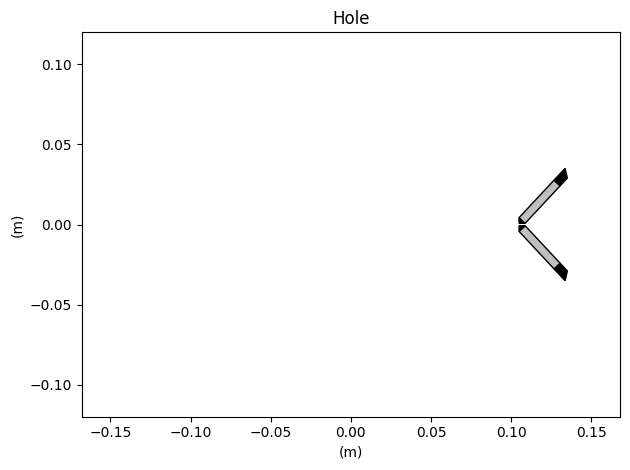

In [363]:
from pyleecan.Classes.HoleM50 import HoleM50
from pyleecan.Classes.HoleM53 import HoleM53
from pyleecan.Classes.HoleM54 import HoleM54
from pyleecan.Classes.HoleM57 import HoleM57
from pyleecan.Classes.HoleM58 import HoleM58    

# HoleM53.plot()
L1_Magnet_Thickness =5.2
L1_Bridge_Thickness = 1.8 # Bridge between magnets and rotor outer lamination 
L1_Magnet_Post      = 1.5
L1_Magnet_Separation   =    6.2
centerToEdgeofMagnet=(L1_Magnet_Post+L1_Magnet_Separation)/2
# L1_Pole_Arc
# L1_Pole_Arc
print("Absolute Value")
print("H0=28                        ")  # need to be computed
print("H1=1,                        ")  # L1_Bridge_Thickness 
print("H2=L1_Magnet_Thickness,      ")  # L1_Magnet_Thickness   
print("H3=0,                        ")  # L1 Magnet Inner Extension        
print("W1=L1_Magnet_Post,           ")  # L1_Magnet_Post          
print("W2=Post Length:           ",W2)  # Calculate From      L1_Magnet_Separation and  L1_Magnet_Post value    

print("W3=L1 Magnet Bar Width_mm,  ")  # L1_Magnet_Bar_Width [mm]  
print("W4=L1_Pole_V_angle/2,        ")  # L1_Pole_V_angle/2 [rad]                

## Ratio
### L1 Pole Arc
r_L1_Pole_Arc=0.9
Edeg_L1_Pole_Arc=180*r_L1_Pole_Arc
print("### L1 Pole Arc")
print("L1 Pole Arc:(Pole Arc - Minimum ) /( Maximum - Minimum):",r_L1_Pole_Arc)
print("Contraints:L1 Magent Separation",L1_Magnet_Separation,"Dimension:L1 Pole Arc[ED]",Edeg_L1_Pole_Arc)

### L1 Web Thickness
r_L1_Web_Thickness=0.9023
print("### L1 Web Thickness")
print("L1 Web Thickness[ratio]: Web Thick - Minimum)/(Maximum - Minimum",r_L1_Web_Thickness)
print("Contraints:L1 Pole Arc",L1_Magnet_Separation,"Dimension:L1 Web Thickness[mm]")

### L1_Magnet_Bar_Width
L1_Magnet_Bar_Width = 0.92
print("### L1_Magnet_Bar_Width",L1_Magnet_Bar_Width)

### L1_Web_Length
L1_Web_Length       = 0.1039
print("### L1_Web_Length",L1_Web_Length)

rotor.hole = list()
rotor.hole.append(
    HoleM53(
        Zh=p_Pole_Pair,
        H0=35*mm,
        H1=1.8*mm,            
        H2=L1_Magnet_Thickness*mm,
        H3=0*mm,
        W1=L1_Magnet_Post*mm,
        W2=W2*mm,
        W3=32*mm,
        W4=0.82,        
))
# rotor.hole.append(
#     HoleM50(
#         Zh=p_Pole_Pair, # Number of Hole around the circumference
#         W0=42.0 * mm,  # Slot opening
#         W1=0, # Tooth width (at V bottom)
#         W2=0, # Distance Magnet to bottom of the V
#         W3=14.0 * mm, # Tooth width (at V top)
#         W4=18.9 * mm, # Magnet Width
#         H0=10.96 * mm, # Slot Depth
#         H1=1.5 * mm, # Distance from the lamination Bore
#         H2=1 * mm, # Additional depth for the magnet
#         H3=6.5 * mm, # Magnet Height
#         H4=0, # Slot top height
#     )
# )
HoleM53.plot(rotor.hole[0])
# a=rotor.get_hole_list()
# r# HoleM53.plot_schematics(rotor.hole[0])

The holes are defined as a list to enable to create several layers of holes and/or to combine different kinds of holes

## Create a shaft and a frame

The classes [**Shaft**](http://www.pyleecan.org/pyleecan.Classes.Shaft.html) and [**Frame**](http://www.pyleecan.org/pyleecan.Classes.Frame.html) enable to add a shaft and a frame to the machine. For this example there is no frame:

In [447]:
from pyleecan.Classes.Shaft import Shaft
from pyleecan.Classes.Frame import Frame

# Set shaft
shaft = Shaft(Drsh=rotor.Rint * 2, # Diamater of the rotor shaft [m]
                                   # used to estimate bearing diameter for friction losses
              Lshaft=1.2 # length of the rotor shaft [m] 
             )
frame = None

## Set materials and magnets

Every Pyleecan object can be saved in JSON using the method `save` and can be loaded with the `load` function.
In this example, the materials *M400_50A* and *Copper1* are loaded and set in the corresponding properties.

In [448]:
# Loading Materials 
M400_50A = load(join(DATA_DIR, "Material", "M400-50A.json"))
Copper1 = load(join(DATA_DIR, "Material", "Copper1.json"))

# Set Materials
stator.mat_type = M400_50A  # Stator Lamination material
rotor.mat_type = M400_50A  # Rotor Lamination material
stator.winding.conductor.cond_mat = Copper1  # Stator winding conductor material

A material can also be defined in scripting as any other Pyleecan object. The material *Magnet_prius* is created with the classes [**Material**](http://www.pyleecan.org/pyleecan.Classes.Material.html) and [**MatMagnetics**](http://www.pyleecan.org/pyleecan.Classes.MatMagnetics.html).

In [449]:
from pyleecan.Classes.Material import Material
from pyleecan.Classes.MatMagnetics import MatMagnetics

# Defining magnets
Magnet_prius = Material(name="Magnet_prius")

# Definition of the magnetic properties of the material
Magnet_prius.mag = MatMagnetics(
    mur_lin = 1.05, # Relative magnetic permeability
    # Hc = 902181.163126629, # Coercitivity field [A/m]
    alpha_Br = -0.001, # temperature coefficient for remanent flux density /°C compared to 20°C
    Brm20 = 1.24, # magnet remanence induction at 20°C [T]
    Wlam = 0, # lamination sheet width without insulation [m] (0 == not laminated)
)

# # Definition of the electric properties of the material 
Magnet_prius.elec.rho = 1.6e-06 # Resistivity at 20°C

# # Definition of the structural properties of the material
Magnet_prius.struct.rho = 7500.0 # mass per unit volume [kg/m3]

The magnet materials are set with the "magnet_X" property. Pyleecan enables to define different magnetization or material for each magnets of the holes. Here both magnets are defined identical.

In [450]:
# Set magnets in the rotor hole
rotor.hole[0].magnet_0.mat_type = Magnet_prius
rotor.hole[0].magnet_1.mat_type = Magnet_prius
rotor.hole[0].magnet_0.type_magnetization = 1
rotor.hole[0].magnet_1.type_magnetization = 1


The B(H) curve of any material can be set as a two columns matrix with:

c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan151\lib\site-packages\pyleecan\Methods\Material\MatMagnetics\plot_BH.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


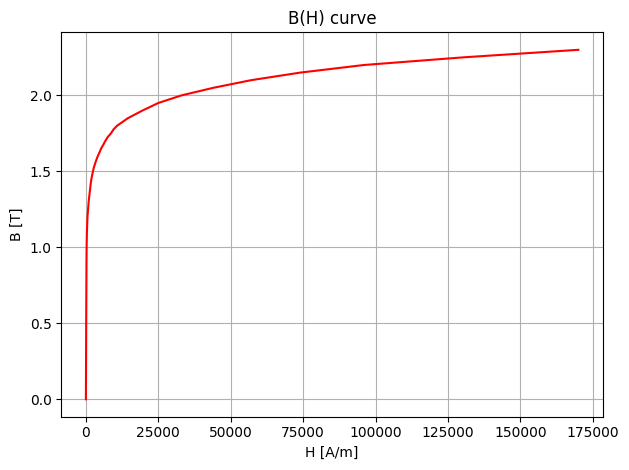

In [451]:
BH = [
    [0.0,0.0],
    [100.0,0.5],
    [150.0,0.7],
    [180.0,0.8],
    [200.0,0.9],
    [250.0,1.0],
    [300.0,1.05],
    [350.0,1.1],
    [450.0,1.15],
    [550.0,1.2],
    [650.0,1.225],
    [750.0,1.25],
    [850.0,1.275],
    [950.0,1.3],
    [1100.0,1.325],
    [1250.0,1.35],
    [1400.0,1.375],
    [1550.0,1.4],
    [1700.0,1.425],
    [1900.0,1.45],
    [2150.0,1.475],
    [2450.0,1.5],
    [2750.0,1.525],
    [3150.0,1.55],
    [3600.0,1.575],
    [4100.0,1.6],
    [4700.0,1.625],
    [5250.0,1.65],
    [6000.0,1.675],
    [6700.0,1.7],
    [7500.0,1.725],
    [8650.0,1.75],
    [9500.0,1.775],
    [10750.0,1.8],
    [14500.0,1.85],
    [19500.0,1.9],
    [25000.0,1.95],
    [33000.0,2.0],
    [44000.0,2.05],
    [57000.0,2.1],
    [74000.0,2.15],
    [96000.0,2.2],
    [130000.0,2.25],
    [170000.0,2.3]
]
M400_50A.mag.BH_curve = BH
fig = M400_50A.mag.plot_BH()

In [462]:
math.radians(30*0.3)
# 360/12


0.15707963267948966

## Create, save and plot the machine
Finally, the Machine object can be created with [**MachineIPMSM**](http://www.pyleecan.org/pyleecan.Classes.MachineIPMSM.html) and saved using the `save` method.

[01:42:15] Saving MachineIPMSM to file 'testGeo.json'.
Saving MachineIPMSM to file 'testGeo.json'.


c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan151\lib\site-packages\pyleecan\Methods\Machine\Machine\plot.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


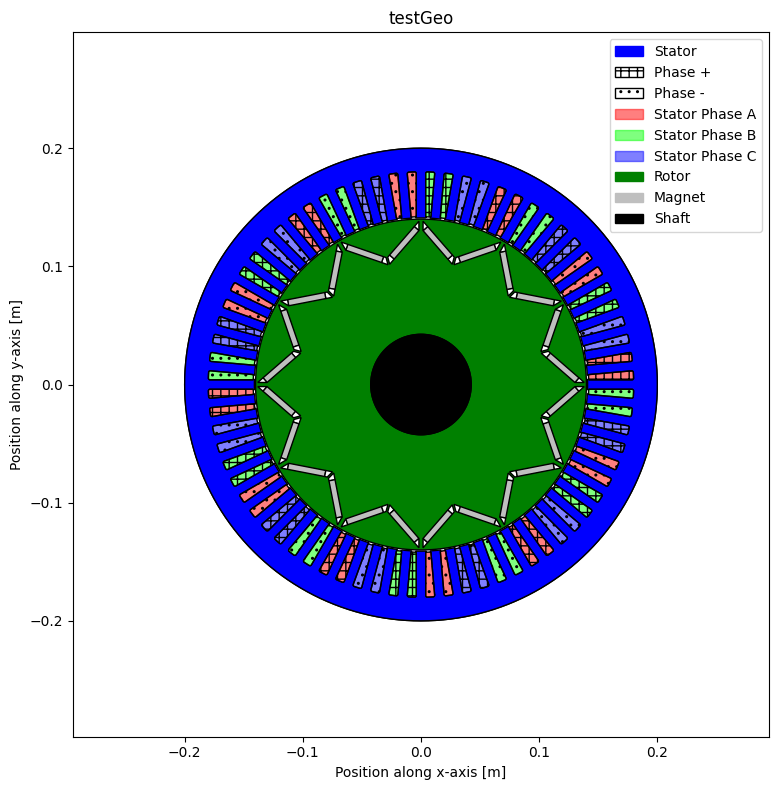

In [452]:
from pyleecan.Classes.MachineIPMSM import MachineIPMSM

# %matplotlib notebook
testGeo = MachineIPMSM(
    name="testGeo", 
    stator=stator, 
    rotor=rotor, 
    shaft=shaft, 
    frame=frame  # None
)
testGeo.save('testGeo.json')

im=testGeo.plot()

Note that Pyleecan also handles ventilation duct thanks to the classes :  
- [**VentilationCirc**](http://www.pyleecan.org/pyleecan.Classes.VentilationCirc.html)  
- [**VentilationPolar**](http://www.pyleecan.org/pyleecan.Classes.VentilationPolar.html)  
- [**VentilationTrap**](http://www.pyleecan.org/pyleecan.Classes.VentilationTrap.html)  

[1] Z. Yang, M. Krishnamurthy and I. P. Brown, "Electromagnetic and vibrational characteristic of IPM over full torque-speed range", *2013 International Electric Machines & Drives Conference*, Chicago, IL, 2013, pp. 295-302.

[2] P. Bonneel, J. Le Besnerais, E. Devillers, C. Marinel, and R. Pile, “Design Optimization of Innovative Electrical Machines Topologies Based on Pyleecan Opensource Object-Oriented Software,” in 24th International Conference on Electrical Machines (ICEM), 2020.